In [1]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as pdr
import os
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yf.pdr_override()
y_symbols = ['AAPL', 'GOOG', 'AMZN', 'TSLA', 'MSFT']

In [3]:
startdate = dt.datetime(2015,1,1)
enddate = dt.datetime(2021,1, 1)

In [4]:
data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%%**********************]  5 of 5 completed


In [5]:
data.head()

Adj Close                                                Close   
                 AAPL     AMZN       GOOG       MSFT       TSLA       AAPL   
Date                                                                         
2015-01-02  24.498684  15.4260  26.168653  40.534851  14.620667  27.332500  \
2015-01-05  23.808514  15.1095  25.623152  40.162083  14.006000  26.562500   
2015-01-06  23.810757  14.7645  25.029282  39.572620  14.085333  26.565001   
2015-01-07  24.144638  14.9210  24.986401  40.075413  14.063333  26.937500   
2015-01-08  25.072334  15.0230  25.065184  41.254356  14.041333  27.972500   

                                                      ...       Open            
               AMZN       GOOG       MSFT       TSLA  ...       AAPL     AMZN   
Date                                                  ...                       
2015-01-02  15.4260  26.168653  46.759998  14.620667  ...  27.847500  15.6290  \
2015-01-05  15.1095  25.623152  46.330002  14.006000  ...  27.072500  15.3505   
2015-01-06  14.7645  25.029282  45.650002  14.085333  ...  26.635000  15.1120   
2015-01-07  14.9210  24.986401  46.230000  14.063333  ...  26.799999  14.8750   
2015-01-08  15.0230  25.065184  47.590000  14.041333  ...  27.307501  15.0160   

                                                Volume                       
                 GOOG       MSFT       TSLA       AAPL      AMZN      GOOG   
Date                                                                         
2015-01-02  26.378078  46.660000  14.858000  212818400  55664000  28951268  \
2015-01-05  26.091366  46.369999  14.303333  257142000  55484000  41196796   
2015-01-06  25.679497  46.380001  14.004000  263188400  70380000  57998800   
2015-01-07  25.280592  45.980000  14.223333  160423600  52806000  41301082   
2015-01-08  24.831326  46.750000  14.187333  237458000  61768000  67071641   

                                
                MSFT      TSLA  
Date                            
2015-01-02  27913900  71466000  
2015-01-05  39673900  80527500  
2015-01-06  36447900  93928500  
2015-01-07  29114100  44526000  
2015-01-08  29645200  51637500  

[5 rows x 30 columns]

Text(0.5, 1.0, 'Stock prices')

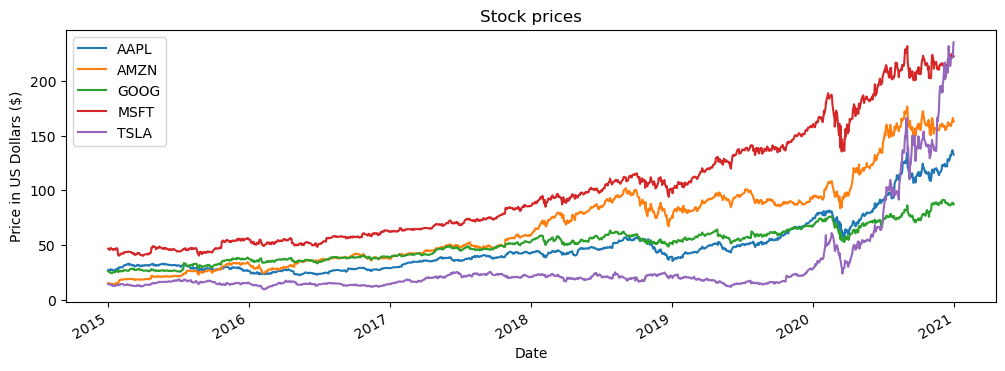

In [6]:
data.Close.plot(figsize = (12, 4))
plt.xlabel('Date')
plt.ylabel('Price in US Dollars ($)')
plt.title('Stock prices')

Most of the variation seems to happen between 2020 and 2021. Lets take a closer look

<Axes: xlabel='Date'>

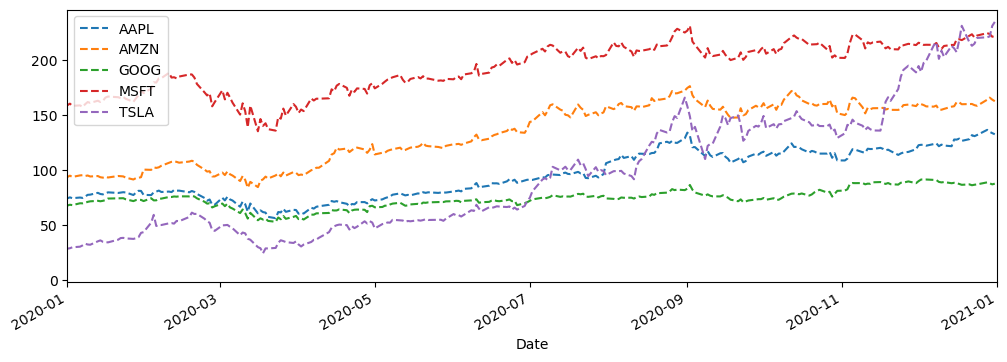

In [7]:
data.Close.plot(xlim = ['2020-01-01', '2021-01-01'], ls = '--', figsize = (12, 4))

### ANALYZE APPLE STOCK

In [8]:
data_aapl = pdr.get_data_yahoo(['AAPL'], start='2015-01-01', end='2019-12-31')
data_aapl.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498680,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808517,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810753,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144638,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072321,237458000


In [9]:
data_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,38.572389,38.911619,38.241615,38.591462,36.419353,1.436337e+08
std,10.965114,11.064943,10.887390,10.990491,11.189187,7.155630e+07
min,22.500000,22.917500,22.367500,22.584999,20.826059,4.544800e+07
25%,28.950001,29.129999,28.625000,28.875000,26.416544,9.511960e+07
50%,37.567501,37.957500,37.290001,37.637501,35.542969,1.263232e+08
75%,46.450001,46.832500,46.145000,46.465000,44.483955,1.715400e+08
max,72.779999,73.492500,72.029999,72.879997,71.095573,6.488252e+08


<Axes: xlabel='Date'>

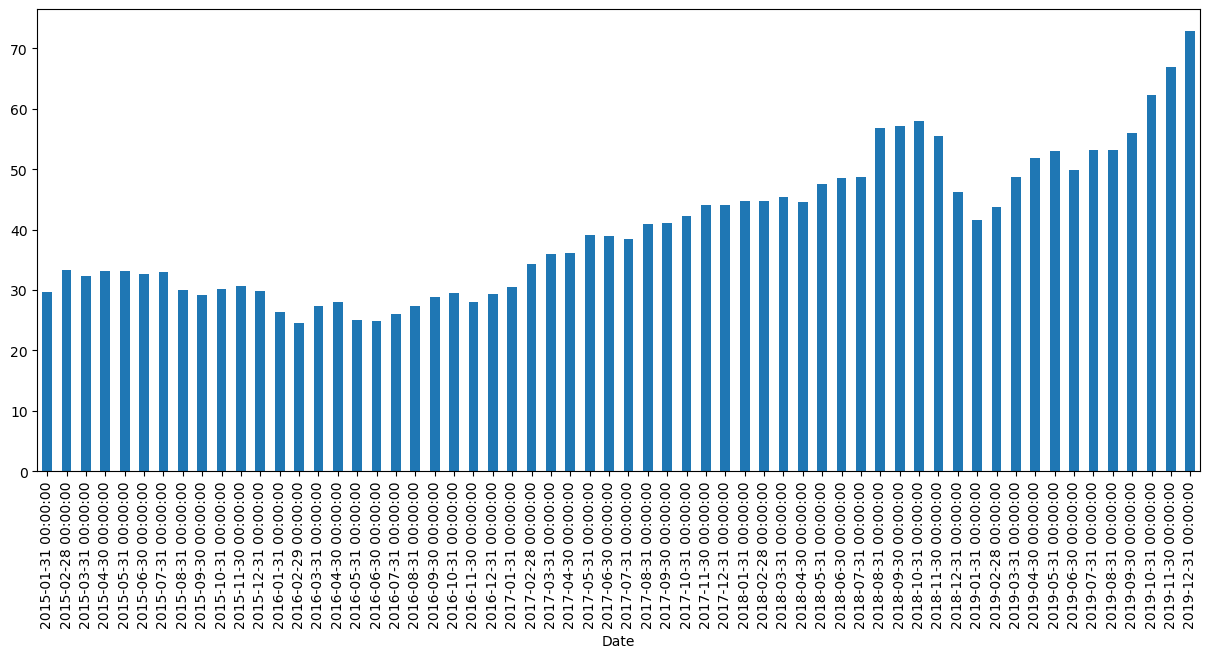

In [10]:
data_aapl.Close.resample(rule = 'M').max().plot(kind = 'bar', figsize = (15, 6))

Text(0, 0.5, 'Prices')

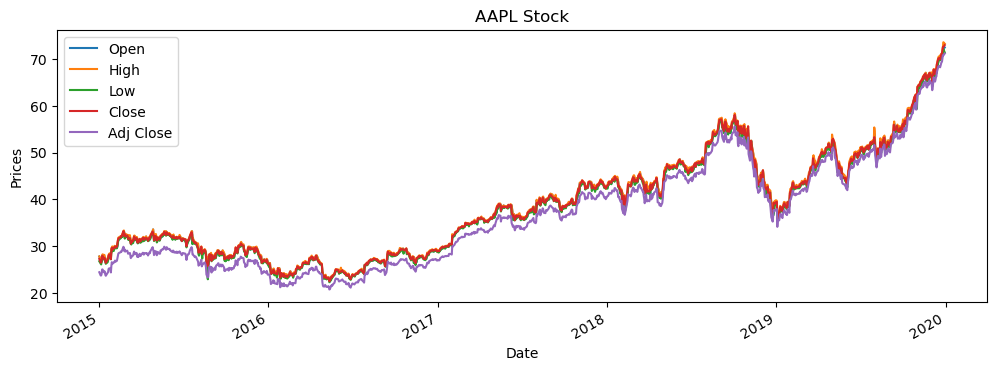

In [11]:
data_aapl.iloc[:, :-1].plot(figsize = (12, 4))
plt.title('AAPL Stock')
plt.ylabel('Prices')

<Axes: xlabel='Date'>

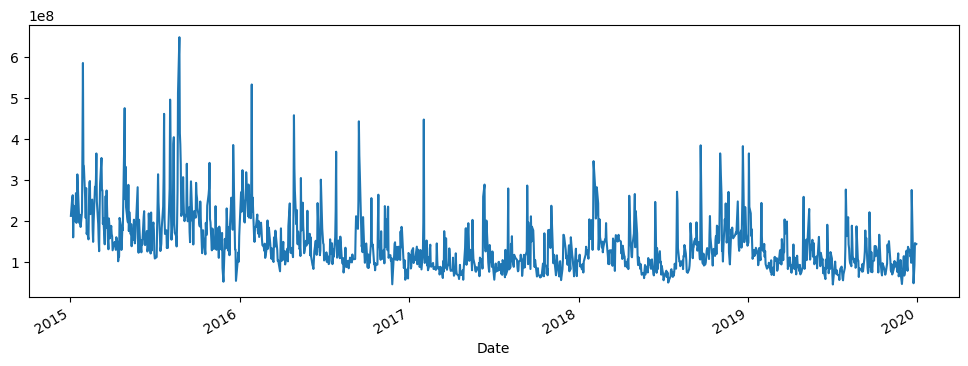

In [12]:
data_aapl.Volume.plot(figsize = (12, 4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

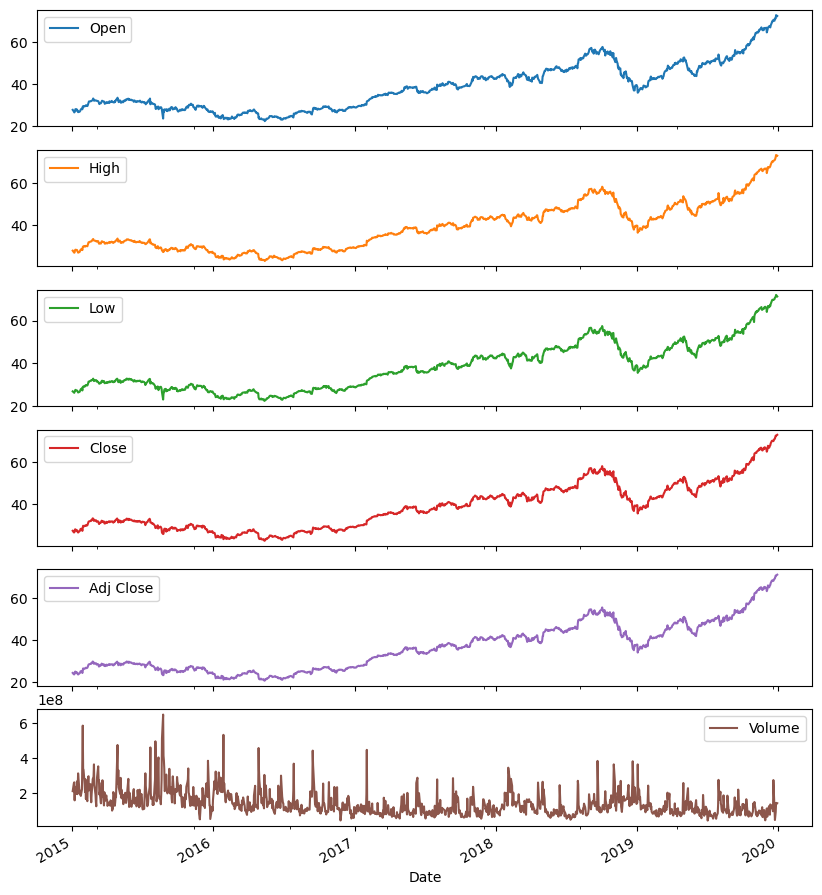

In [13]:
data_aapl.plot(subplots = True, figsize = (10, 12))

Lets look at the close value of the stock

<Axes: xlabel='Date'>

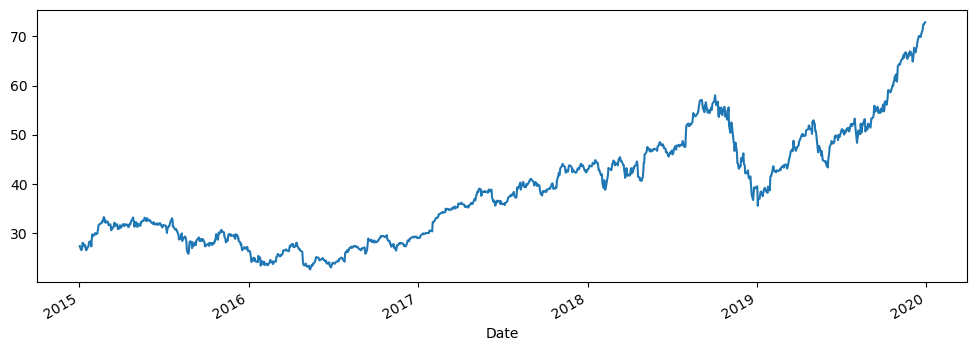

In [14]:
data_aapl.Close.plot(figsize = (12, 4))

Text(0.5, 1.0, 'Distribution of close prices over the days')

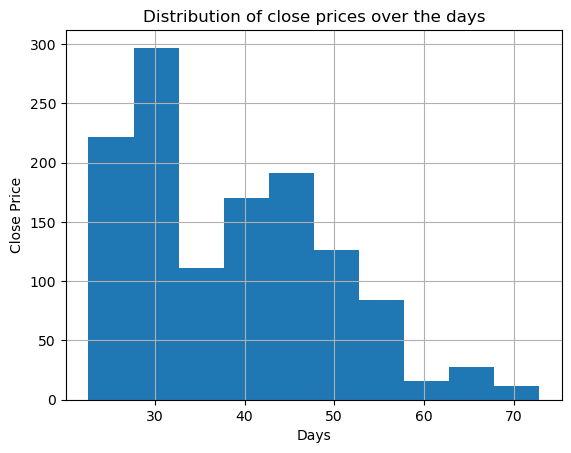

In [15]:
data_aapl.Close.hist()
plt.ylabel('Close Price')
plt.xlabel('Days')
plt.title('Distribution of close prices over the days')

In [16]:
data_aapl.Close.rolling(10).mean()

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
                ...    
2019-12-23    69.233249
2019-12-24    69.627998
2019-12-26    70.106499
2019-12-27    70.564999
2019-12-30    70.974249
Name: Close, Length: 1257, dtype: float64

### Simple Moving Average

Moving Average:
Average of the last n days

In [17]:
#Calculate moving average of first 50 days
ma20 = data_aapl.Close.rolling(20).mean()
#Calculate moving average of first 50 days
ma50 = data_aapl.Close.rolling(50).mean()
#Calculate moving average of first 100 days
ma100 = data_aapl.Close.rolling(100).mean()
#Calculate moving average of first 200 days
ma200 = data_aapl.Close.rolling(200).mean()

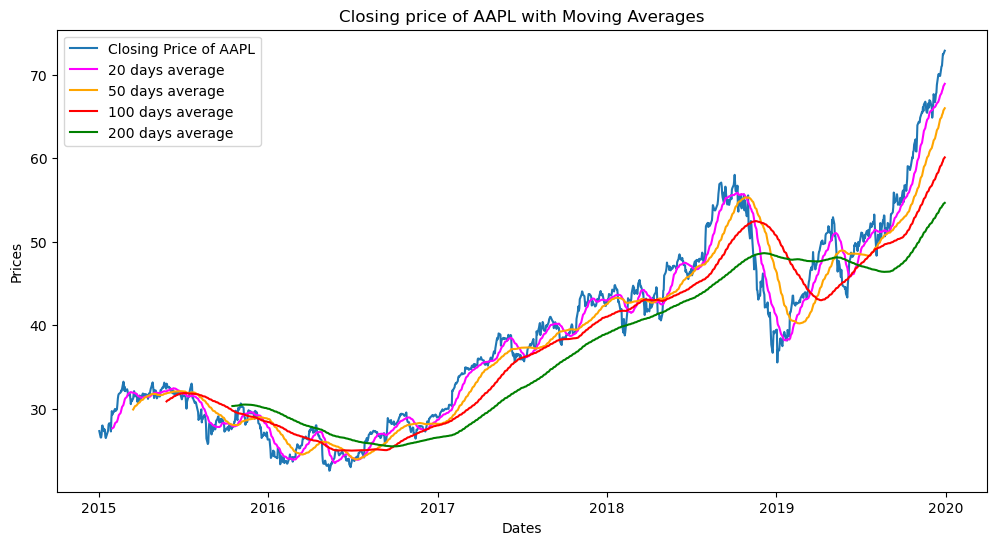

In [18]:
plt.figure(figsize = (12, 6))
plt.plot(data_aapl.Close, label = 'Closing Price of AAPL')
plt.plot(ma20, 'magenta', label = '20 days average')
plt.plot(ma50, 'orange', label = '50 days average')
plt.plot(ma100, 'r', label = '100 days average')
plt.plot(ma200, 'g', label = '200 days average')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of AAPL with Moving Averages')
plt.legend()

For 2019

In [19]:
data_aapl_2019 = pdr.get_data_yahoo(['AAPL'], start='2019-01-01', end='2019-12-31')
data_aapl_2019.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.943249,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163830,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622253,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542969,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220524,164101200


In [20]:
#2019
#Calculate moving average of first 50 days
ma20_2019 = data_aapl_2019.Close.rolling(20).mean()
#Calculate moving average of first 50 days
ma50_2019 = data_aapl_2019.Close.rolling(50).mean()
#Calculate moving average of first 100 days
ma100_2019 = data_aapl_2019.Close.rolling(100).mean()

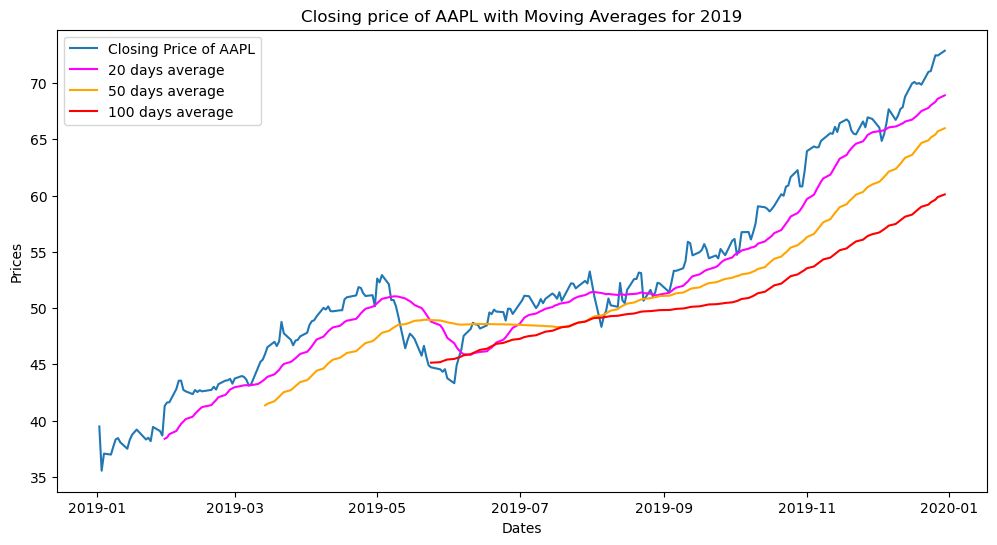

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(data_aapl_2019.Close, label = 'Closing Price of AAPL')
plt.plot(ma20_2019, 'magenta', label = '20 days average')
plt.plot(ma50_2019, 'orange', label = '50 days average')
plt.plot(ma100_2019, 'r', label = '100 days average')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of AAPL with Moving Averages for 2019')
plt.legend()

### Cumulative Moving Average

In [22]:
cma_aapl = data_aapl.Close.expanding().mean()

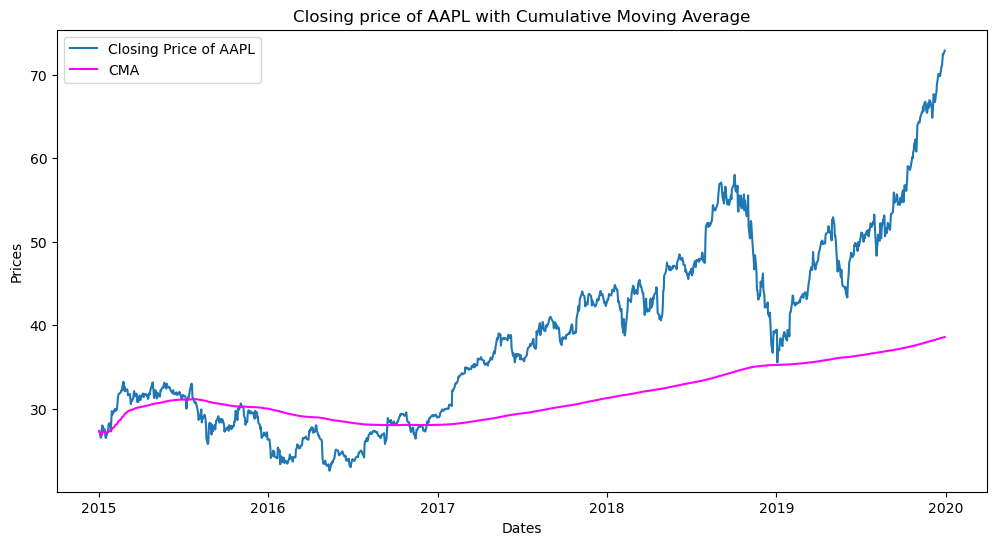

In [23]:
plt.figure(figsize = (12, 6))
plt.plot(data_aapl.Close, label = 'Closing Price of AAPL')
plt.plot(cma_aapl, 'magenta', label = 'CMA')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of AAPL with Cumulative Moving Average')
plt.legend()

In [24]:
#for 2019
cma_aapl_2019 = data_aapl_2019.Close.expanding().mean()

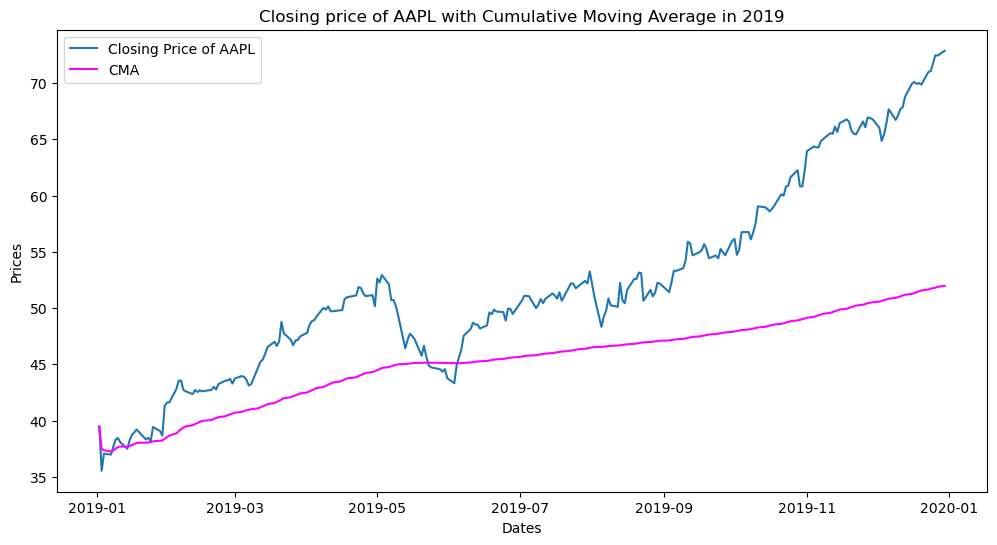

In [25]:
plt.figure(figsize = (12, 6))
plt.plot(data_aapl_2019.Close, label = 'Closing Price of AAPL')
plt.plot(cma_aapl_2019, 'magenta', label = 'CMA')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of AAPL with Cumulative Moving Average in 2019')
plt.legend()

### Exponential Weighted Moving Average (EWMA)

$ewma(t) = a * x(t) + (1-a) * ewma(t-1)$

where, $a \implies$ weight factor that gives higher priority to the price at time $t$ compared to the price at $t-1$ (This is done to prevent lags)

In [26]:
ewma_0 = data_aapl.Close.ewm(alpha = 0.1, adjust = False).mean()
ewma_1 = data_aapl.Close.ewm(alpha = 0.3, adjust = False).mean()

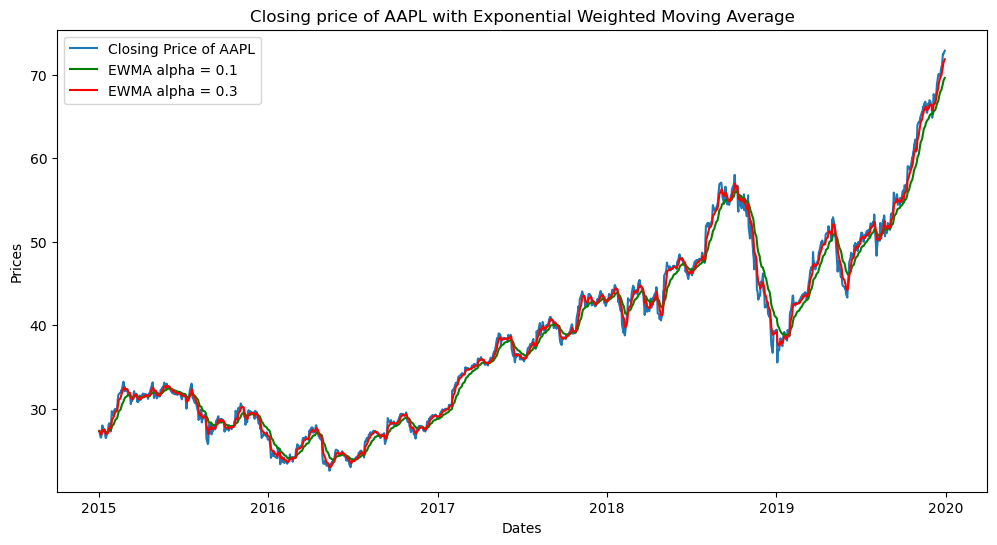

In [27]:
plt.figure(figsize = (12, 6))
plt.plot(data_aapl.Close, label = 'Closing Price of AAPL')
plt.plot(ewma_0, 'g', label = 'EWMA alpha = 0.1')
plt.plot(ewma_1, 'r', label = 'EWMA alpha = 0.3')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of AAPL with Exponential Weighted Moving Average')
plt.legend()

In [28]:
#for 2019
ewma_0_2019 = data_aapl_2019.Close.ewm(alpha = 0.1, adjust = False).mean()
ewma_1_2019 = data_aapl_2019.Close.ewm(alpha = 0.3, adjust = False).mean()

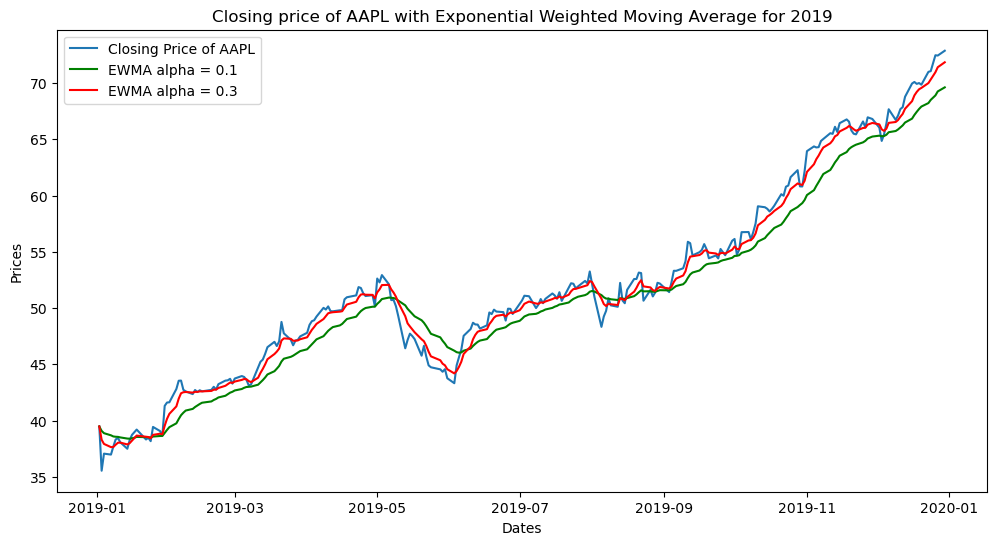

In [30]:
plt.figure(figsize = (12, 6))
plt.plot(data_aapl_2019.Close, label = 'Closing Price of AAPL')
plt.plot(ewma_0_2019, 'g', label = 'EWMA alpha = 0.1')
plt.plot(ewma_1_2019, 'r', label = 'EWMA alpha = 0.3')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Closing price of AAPL with Exponential Weighted Moving Average for 2019')
plt.legend()

Source:
- https://www.youtube.com/watch?v=s3CnE2tqQdo&t=365s
- https://www.youtube.com/watch?v=N9NqTp_D_bw